# Explaining Pima Diabetes Prediction with Eli5, Shap and LIME

## The Dataset
[Pima Indians Diabetes Database](https://www.kaggle.com/uciml/pima-indians-diabetes-database)

In [1]:
# Load EDA Pkgs
import pandas as pd
import numpy as np

In [2]:
# Load ML Pkgs
from sklearn.preprocessing import MinMaxScaler as Scaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 

In [3]:
# Load Viz Pkgs
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
names = ["Num_of_Preg","Glucose_Conc","BP","Skin_Thickness","TwoHour_Insulin","BMI","DM_Pedigree","Age","Class"]

In [5]:
# Load Dataset
df = pd.read_csv("pima-indians-diabetes.csv",names=names)

In [6]:
df.head()

,Num_of_Preg,Glucose_Conc,BP,Skin_Thickness,TwoHour_Insulin,BMI,DM_Pedigree,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.shape

(768, 9)

In [8]:
# Check For Missing Values
df.isna().sum()

Num_of_Preg        0
Glucose_Conc       0
BP                 0
Skin_Thickness     0
TwoHour_Insulin    0
BMI                0
DM_Pedigree        0
Age                0
Class              0
dtype: int64

In [9]:
# Data Types
df.dtypes

Num_of_Preg          int64
Glucose_Conc         int64
BP                   int64
Skin_Thickness       int64
TwoHour_Insulin      int64
BMI                float64
DM_Pedigree        float64
Age                  int64
Class                int64
dtype: object

In [10]:
# Check For Occurence of Class
df.groupby('Class').size()

Class
0    500
1    268
dtype: int64

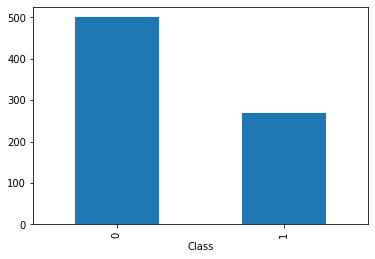

In [11]:
df.groupby('Class').size().plot(kind="bar")

In [12]:
# Check For Correlation Between Xtics/Features
corr = df.corr()

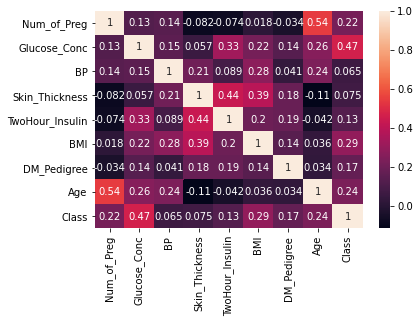

In [13]:
sns.heatmap(corr,annot=True)

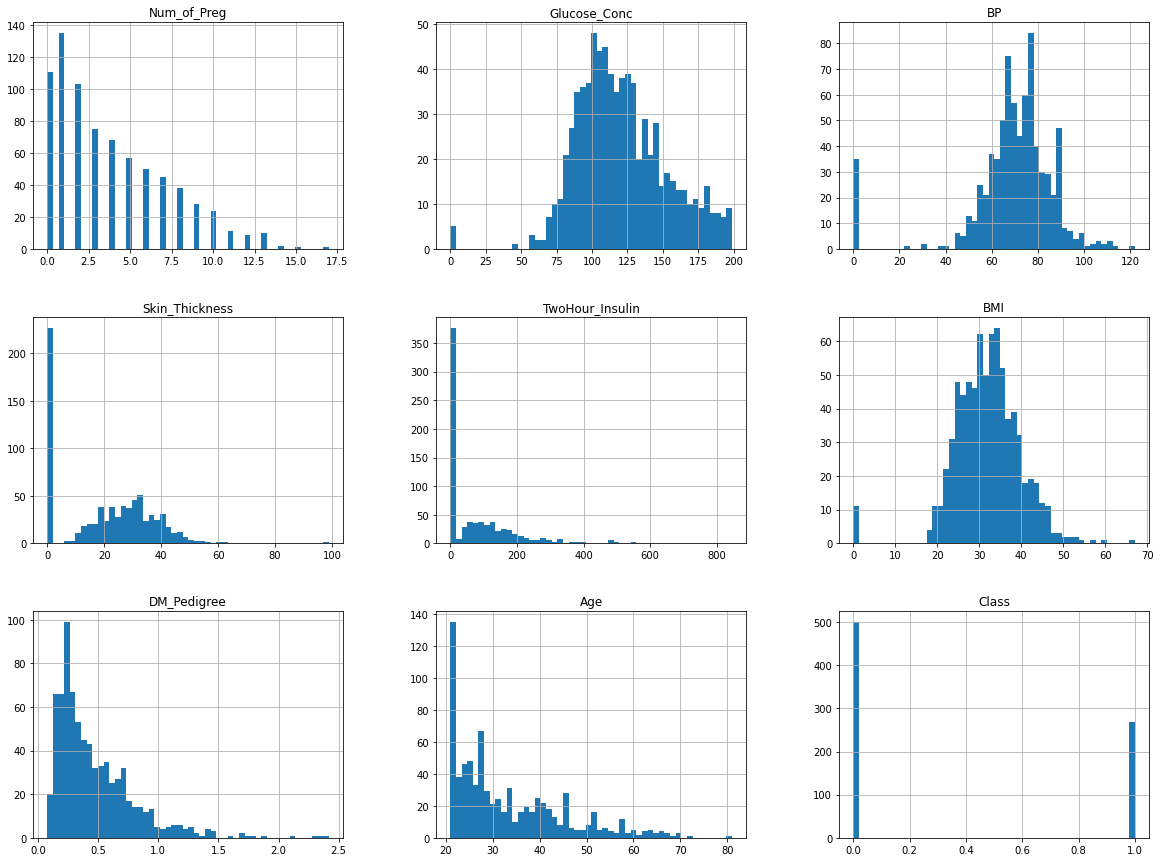

In [14]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

In [15]:
# Descriptive Analysis Transposed
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Num_of_Preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose_Conc,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BP,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
Skin_Thickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
TwoHour_Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DM_Pedigree,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


#### BP and BMI canot be zero

In [16]:
# Checking For Minimum BP
df['BP'].min()

0

In [17]:
# Checking For Minimum BMI
df['BMI'].min()

0.0

In [18]:
# Replace 0 with Median
df['BP'] = df['BP'].replace(to_replace=0,value=df['BP'].median())

In [19]:
# Recheck
df['BP'].min()

24

In [20]:
# Replace 0 with Median
df['BMI'] = df['BMI'].replace(to_replace=0,value=df['BMI'].median())

In [21]:
# Replace 0 with Median
df['Glucose_Conc'] = df['Glucose_Conc'].replace(to_replace=0,value=df['Glucose_Conc'].median())

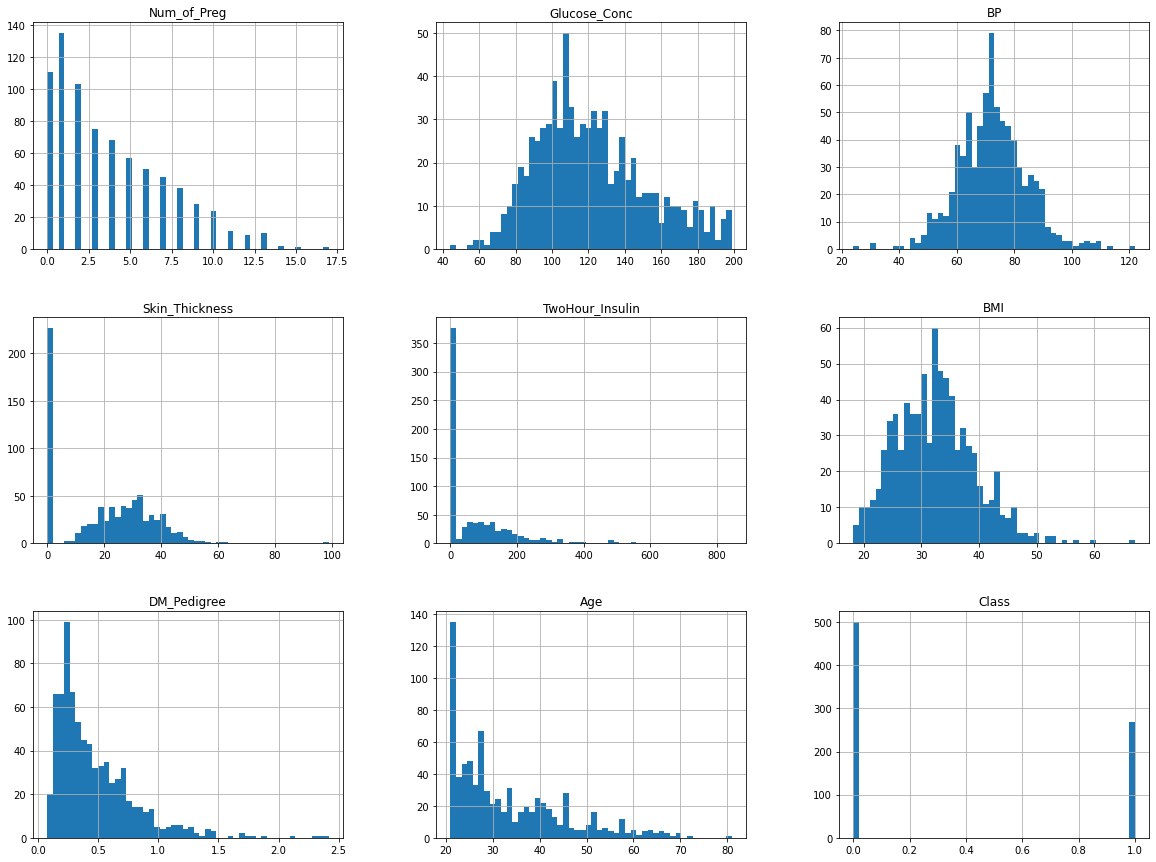

In [22]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

#### Features prepration

In [23]:
df.columns

Index(['Num_of_Preg', 'Glucose_Conc', 'BP', 'Skin_Thickness',
       'TwoHour_Insulin', 'BMI', 'DM_Pedigree', 'Age', 'Class'],
      dtype='object')

In [24]:
df.shape

(768, 9)

In [25]:
df.iloc[:,0:8]

,Num_of_Preg,Glucose_Conc,BP,Skin_Thickness,TwoHour_Insulin,BMI,DM_Pedigree,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [26]:
Xfeatures = df.iloc[:,0:8]

In [27]:
Ylabels = df['Class']

#### Dataset Scaling

In [28]:
scaler = Scaler()
X = scaler.fit_transform(Xfeatures)

In [29]:
X.shape

(768, 8)

In [30]:
names[0:8]

['Num_of_Preg',
 'Glucose_Conc',
 'BP',
 'Skin_Thickness',
 'TwoHour_Insulin',
 'BMI',
 'DM_Pedigree',
 'Age']

In [31]:
X = pd.DataFrame(X,columns=names[0:8])

In [32]:
X.head()

,Num_of_Preg,Glucose_Conc,BP,Skin_Thickness,TwoHour_Insulin,BMI,DM_Pedigree,Age
0,0.352941,0.670968,0.489796,0.353535,0.000000,0.314928,0.234415,0.483333
1,0.058824,0.264516,0.428571,0.292929,0.000000,0.171779,0.116567,0.166667
2,0.470588,0.896774,0.408163,0.000000,0.000000,0.104294,0.253629,0.183333
3,0.058824,0.290323,0.428571,0.232323,0.111111,0.202454,0.038002,0.000000
4,0.000000,0.600000,0.163265,0.353535,0.198582,0.509202,0.943638,0.200000


#### Split Dataset

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,Ylabels,test_size=0.2,random_state=42)

In [34]:
X_train.shape

(614, 8)

#### Building the Model

In [35]:
# Logit
logit = LogisticRegression()
logit.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
print("Accuracy Score of Logisitic::",logit.score(X_test,y_test))

Accuracy Score of Logisitic:: 0.7792207792207793


In [37]:
X_test.values[0]

array([0.35294118, 0.3483871 , 0.34693878, 0.33333333, 0.22458629,
       0.32310838, 0.15029889, 0.36666667])

In [38]:
# Prediction on A Single Sample
logit.predict(np.array(X_test.values[0]).reshape(1,-1))

array([0])

### Interpreting Models
+ Shap
+ LIME
+ Eli5

#### SHAP explainers
+ TreeExplainer: XGBoost/LightGBM/CatBoost/etc.
+ DeepExplainer: for Deep learning models (TensorFlow/Keras)
+ GradientExplainer: Deep learning models (TensorFlow/Keras/PyTorch)
+ KernelExplainer: Model agnostic (slow, gives an approximation)

In [ ]:
!pip install shap

In [93]:
# Shap Pkg importing
import shap

In [94]:
explainer = shap.KernelExplainer(logit.predict_proba, X_train)

Using 614 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [95]:
shap_values = explainer.shap_values(X_test)

In [96]:
# Initialize JS For Plotting
shap.initjs()

shap.force_plot(explainer.expected_value[0], shap_values[0], X_test)

#### Narrative
+ Red: Features that push the prediction to the base line
+ Blue: Features that pull the prediction lower from the base line      

### Summary of All Effect of All Features
+ Using shap.summary_plot()

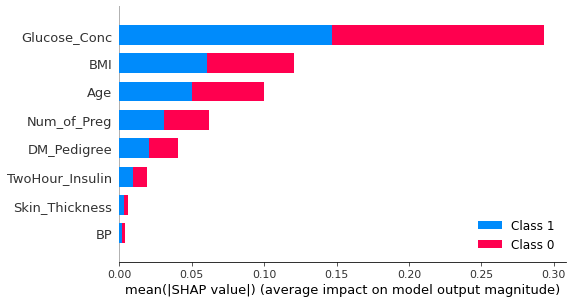

In [97]:
shap.summary_plot(shap_values,X_test)

### Dependency Plot
+ Shows the effect a single feature has on the prediction
+ How much the prediction depends on a particular feature
+ shap.dependence_plot(indexoffeature, matrix_shap_values, dataset_matrix)

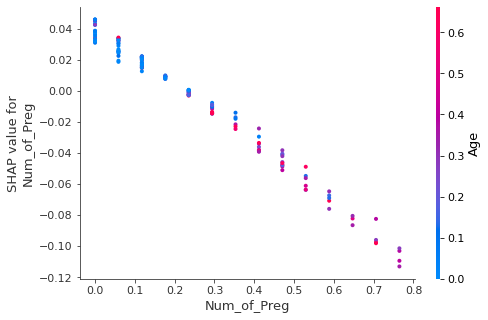

In [98]:
shap.dependence_plot(0,shap_values[0], X_test)

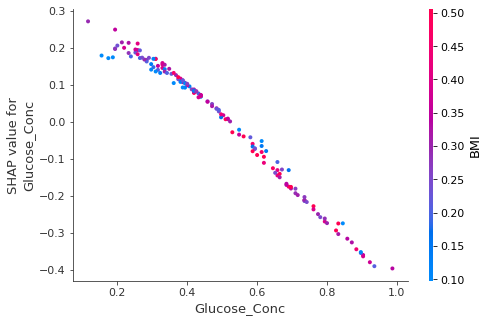

In [99]:
# Glucose Concentration
shap.dependence_plot(1,shap_values[0], X_test)

#### Using LIME(Local Interpretable Model Agnostic Explainer)
+ Data
+ Model
+ Class Names/Feature Names
+ Prediction Function

In [78]:
!pip install lime

In [79]:
# Load our pkgs
import lime
import lime.lime_tabular

In [80]:
Ylabels.unique()

array([1, 0])

In [81]:
class_names = ['No-Diabetes','Diabetes']

In [82]:
df.columns

Index(['Num_of_Preg', 'Glucose_Conc', 'BP', 'Skin_Thickness',
       'TwoHour_Insulin', 'BMI', 'DM_Pedigree', 'Age', 'Class'],
      dtype='object')

In [83]:
feature_names = ['Num_of_Preg', 'Glucose_Conc', 'BP', 'Skin_Thickness',
       'TwoHour_Insulin', 'BMI', 'DM_Pedigree', 'Age']

In [84]:
# Create our Explainer ,a Tabular Explainer since it is a tabular data
explainer1 = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=feature_names, class_names=class_names, discretize_continuous=True)

In [85]:
# Sample We Predicted 
X_test.iloc[0]

Num_of_Preg        0.352941
Glucose_Conc       0.348387
BP                 0.346939
Skin_Thickness     0.333333
TwoHour_Insulin    0.224586
BMI                0.323108
DM_Pedigree        0.150299
Age                0.366667
Name: 668, dtype: float64

In [86]:
y_test.iloc[0]

0

In [87]:
# The Explainer Instance
exp1 = explainer1.explain_instance(X_test.iloc[0],logit.predict_proba,num_features=8,top_labels=1)

In [88]:
# Show in notebook
exp1.show_in_notebook(show_table=True, show_all=False)


### Using Eli5 (Explain like I'm 5)

In [ ]:
!pip install eli5

In [89]:
import eli5

In [90]:
# Showing the Weight for our model
eli5.show_weights(logit,top=10)

Weight?,Feature
+4.214,x1
+3.081,x5
+1.532,x7
+1.047,x6
+0.975,x0
+0.109,x3
-0.119,x2
-0.487,x4
-4.402,<BIAS>


In [91]:
# Clearly Define Feature Names
eli5.show_weights(logit,feature_names=feature_names,target_names = class_names)

Weight?,Feature
+4.214,Glucose_Conc
+3.081,BMI
+1.532,Age
+1.047,DM_Pedigree
+0.975,Num_of_Preg
+0.109,Skin_Thickness
-0.119,BP
-0.487,TwoHour_Insulin
-4.402,<BIAS>


In [92]:
# Show Explaination For A Single Prediction
eli5.show_prediction(logit, X_test.iloc[0],feature_names=feature_names,target_names=class_names)